In [2]:
%matplotlib inline

In [100]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from scipy.stats import multivariate_normal
from sklearn.datasets import make_swiss_roll

from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD
from sklearn.manifold import Isomap

# Dimensionality Reduction

## Live Demos

In [11]:
# RVS performs random sampling
points = multivariate_normal(mean= [5, 3 ], cov= [[1, 0.5], [0.5, 1]]).rvs(size = 5000)

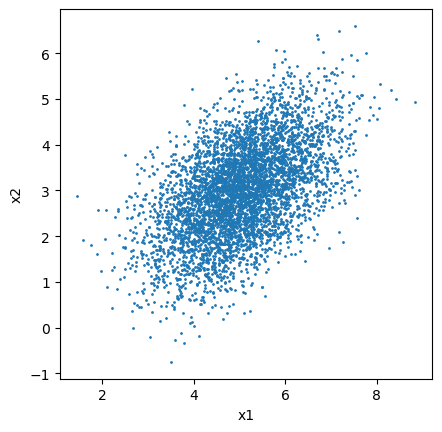

In [13]:
plt.scatter(points[:,0], points[:,1], s = 1)
plt.gca().set_aspect('equal')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [15]:
x_center = np.mean(points, axis = 0)
x_center

array([5.02482503, 2.9959908 ])

In [20]:
# Shift the points at the center
center_points = points - x_center
center_points

array([[-1.76967486, -0.83324985],
       [ 1.3140878 ,  0.68912018],
       [ 0.87687509,  1.50900211],
       ...,
       [ 0.10611383,  1.1583845 ],
       [-2.66745914, -0.44539363],
       [ 0.60865924,  0.00640336]])

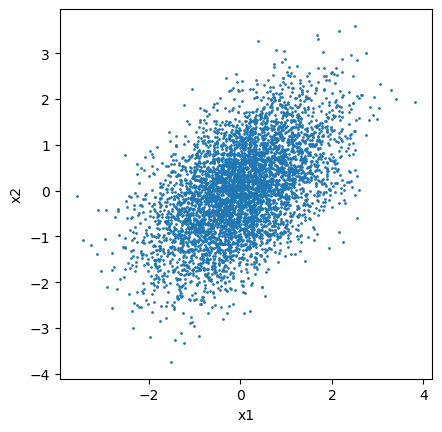

In [21]:
plt.scatter(center_points[:,0], center_points[:,1], s = 1)
plt.gca().set_aspect('equal')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [22]:
center_points.mean(axis = 0)

array([-6.22373264e-15, -5.40190115e-16])

In [23]:
np.corrcoef(points[:,0], points[:,1])

array([[1.        , 0.51914622],
       [0.51914622, 1.        ]])

In [25]:
covariance_matrix = np.cov(points[:,0], points[:,1])
covariance_matrix

array([[0.98270868, 0.51923024],
       [0.51923024, 1.01792497]])

In [29]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
eigenvalues, eigenvectors

(array([0.48078811, 1.51984554]),
 array([[-0.71898976, -0.69502067],
        [ 0.69502067, -0.71898976]]))

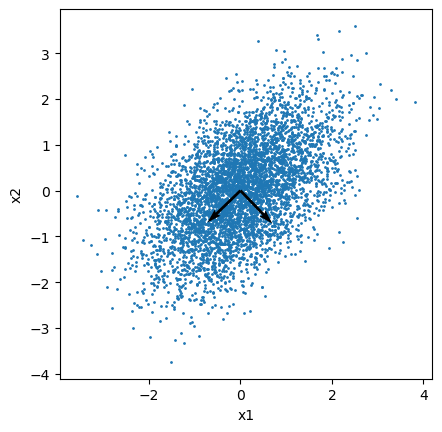

In [35]:
plt.scatter(center_points[:,0], center_points[:,1], s = 1)
plt.gca().set_aspect('equal')
plt.quiver([0, 0], [0, 0], [eigenvectors[0][0], eigenvectors[1][0]], [eigenvectors[0][1], eigenvectors[1][1]], angles = 'xy', scale_units = 'xy', scale = 1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [36]:
np.dot(eigenvectors[:,0],eigenvectors[:,1]) 

0.0

In [38]:
np.linalg.inv(eigenvectors)

array([[-0.71898976,  0.69502067],
       [-0.69502067, -0.71898976]])

In [44]:
np.linalg.inv(eigenvectors) @ np.array([[eigenvalues[0], 0], [0, eigenvalues[1]]]) @ eigenvectors

array([[ 0.98270868, -0.51923024],
       [-0.51923024,  1.01792497]])

In [45]:
covariance_matrix

array([[0.98270868, 0.51923024],
       [0.51923024, 1.01792497]])

In [46]:
covariance_matrix == np.linalg.inv(eigenvectors) @ np.array([[eigenvalues[0], 0], [0, eigenvalues[1]]]) @ eigenvectors

array([[ True, False],
       [False,  True]])

### PCA

In [59]:
pca = PCA(n_components=1)

In [60]:
pca.fit(points)

PCA(n_components=1)

In [61]:
pca.components_

array([[0.69502067, 0.71898976]])

In [62]:
eigenvectors

array([[-0.71898976, -0.69502067],
       [ 0.69502067, -0.71898976]])

In [63]:
pca.explained_variance_

array([1.51984554])

In [64]:
eigenvalues

array([0.48078811, 1.51984554])

In [65]:
pca.explained_variance_ratio_

array([0.75968208])

In [66]:
pca.transform(points)

array([[-1.82905872],
       [ 1.40878854],
       [ 1.69440337],
       ...,
       [ 0.9066179 ],
       [-2.1741727 ],
       [ 0.4276347 ]])

### Kernel PCA

In [79]:
kernel_pca = KernelPCA(n_components=4, kernel= 'rbf', degree = 3)

In [80]:
kernel_pca.fit(points)

KernelPCA(kernel='rbf', n_components=4)

In [81]:
kernel_pca

KernelPCA(kernel='rbf', n_components=4)

In [82]:
kernel_pca.transform(points)

array([[-0.4931384 ,  0.45521198, -0.29199925,  0.32454025],
       [ 0.62773457,  0.30858891,  0.19995789,  0.27871279],
       [ 0.60752388,  0.40324787, -0.20026988, -0.2493458 ],
       ...,
       [ 0.50097273, -0.07514861, -0.40752129, -0.35316312],
       [-0.17932438,  0.42787929, -0.22361845,  0.28750098],
       [ 0.30410826, -0.30658825,  0.39485515,  0.12535864]])

### TruncatedSVD

In [96]:
truncated_svd = TruncatedSVD(n_components=1)

In [97]:
truncated_svd.fit_transform(points)

array([[3.90479067],
       [7.33098973],
       [7.38226728],
       ...,
       [6.54141345],
       [3.33823571],
       [6.37380027]])

In [98]:
truncated_svd.explained_variance_

array([1.45230608])

### Isometric mapping

In [110]:
isomap = Isomap(n_neighbors=20)

In [111]:
swiss_rol = make_swiss_roll(n_samples=500)[0]

In [112]:
isomap.fit(swiss_rol)

Isomap(n_neighbors=20)

In [113]:
result = isomap.transform(swiss_rol)

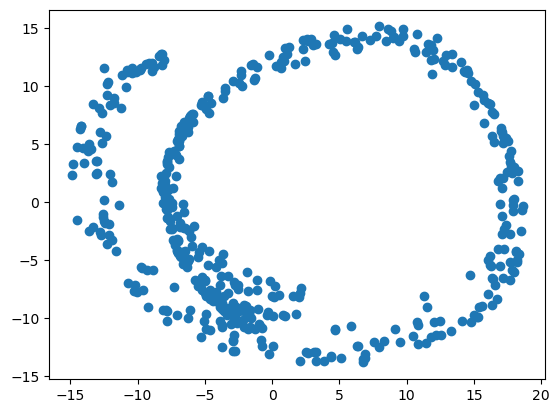

In [114]:
plt.scatter(result[:,0], result[:,1])
plt.show()